# **Manipulation 02** : Détection de contours

1 et 2: Lecture et transformation en niveaux de gris

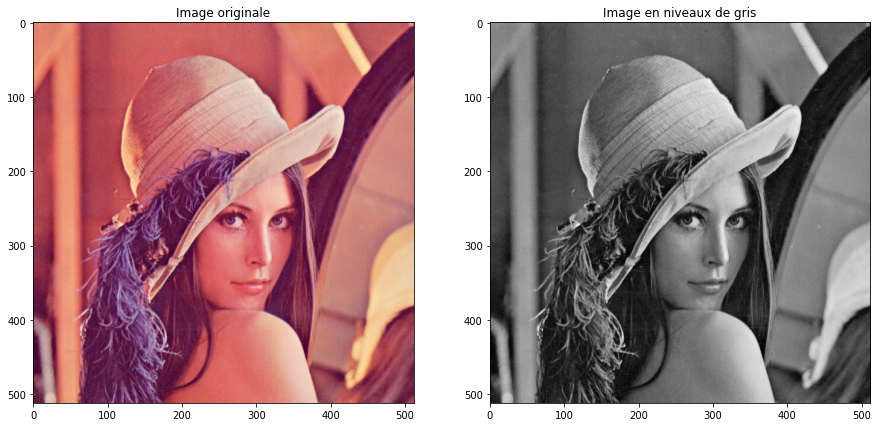

In [ ]:
plt.figure(figsize = (15, 15))

image2=cv.imread('lena.png')
image2=cv.cvtColor(image2, cv.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.title('Image originale')
plt.imshow(image2)

# Conversion en niveaux de gris
image_gris=cv.cvtColor(image2, cv.COLOR_BGR2GRAY)
plt.subplot(1,2,2)
plt.title('Image en niveaux de gris')
plt.imshow(image_gris, cmap='gray')

3/ Gradient classique, Prewitt et Sobel:

3/1/ Gradient classique:

<ipython-input-19-82aff3ecaad1>:10: RuntimeWarning: invalid value encountered in true_divide
  phase_class=np.arctan(np.divide(Gy,Gx))     #Calcul de la phase


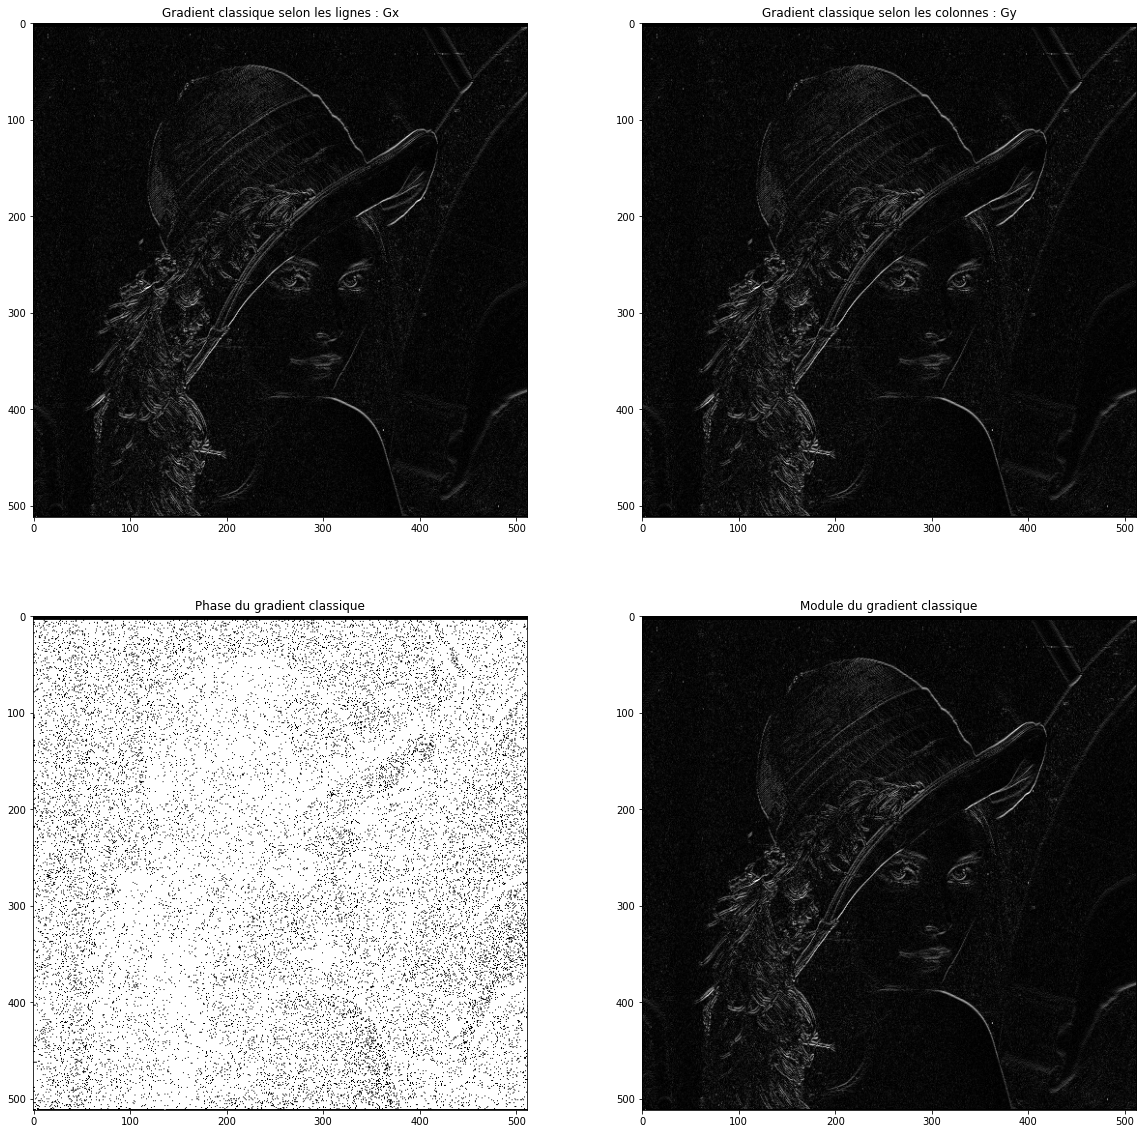

In [ ]:
plt.figure(figsize=(20,20))

# Gradient classique
kernelx=np.array([-1,1], dtype=int)     # Noyau du filtre selon X
kernely=np.array([1,-1], dtype=int)     # Noyau du filtre selon Y
x=cv.filter2D(image_gris, cv.CV_16S, kernelx)     #cv.CV_16S pour désigner les entiers signés codés sur 2 octets
y=cv.filter2D(image_gris, cv.CV_16S, kernely)
Gx=cv.convertScaleAbs(x)
Gy=cv.convertScaleAbs(y)
phase_class=np.arctan(np.divide(Gy,Gx))     #Calcul de la phase
Phase_class=cv.convertScaleAbs(phase_class)
Module_class=cv.addWeighted(Gx,0.5,Gy,0.5,0)
images=[Gx,Gy,Phase_class,Module_class]
titres=["Gradient classique selon les lignes : Gx","Gradient classique selon les colonnes : Gy","Phase du gradient classique","Module du gradient classique"]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titres[i])

3/2/ Prewitt:

<ipython-input-21-c916b5a0e93f>:10: RuntimeWarning: divide by zero encountered in true_divide
  phase_prewitt=np.arctan(np.divide(Gy,Gx))     #Calcul de la phase
<ipython-input-21-c916b5a0e93f>:10: RuntimeWarning: invalid value encountered in true_divide
  phase_prewitt=np.arctan(np.divide(Gy,Gx))     #Calcul de la phase


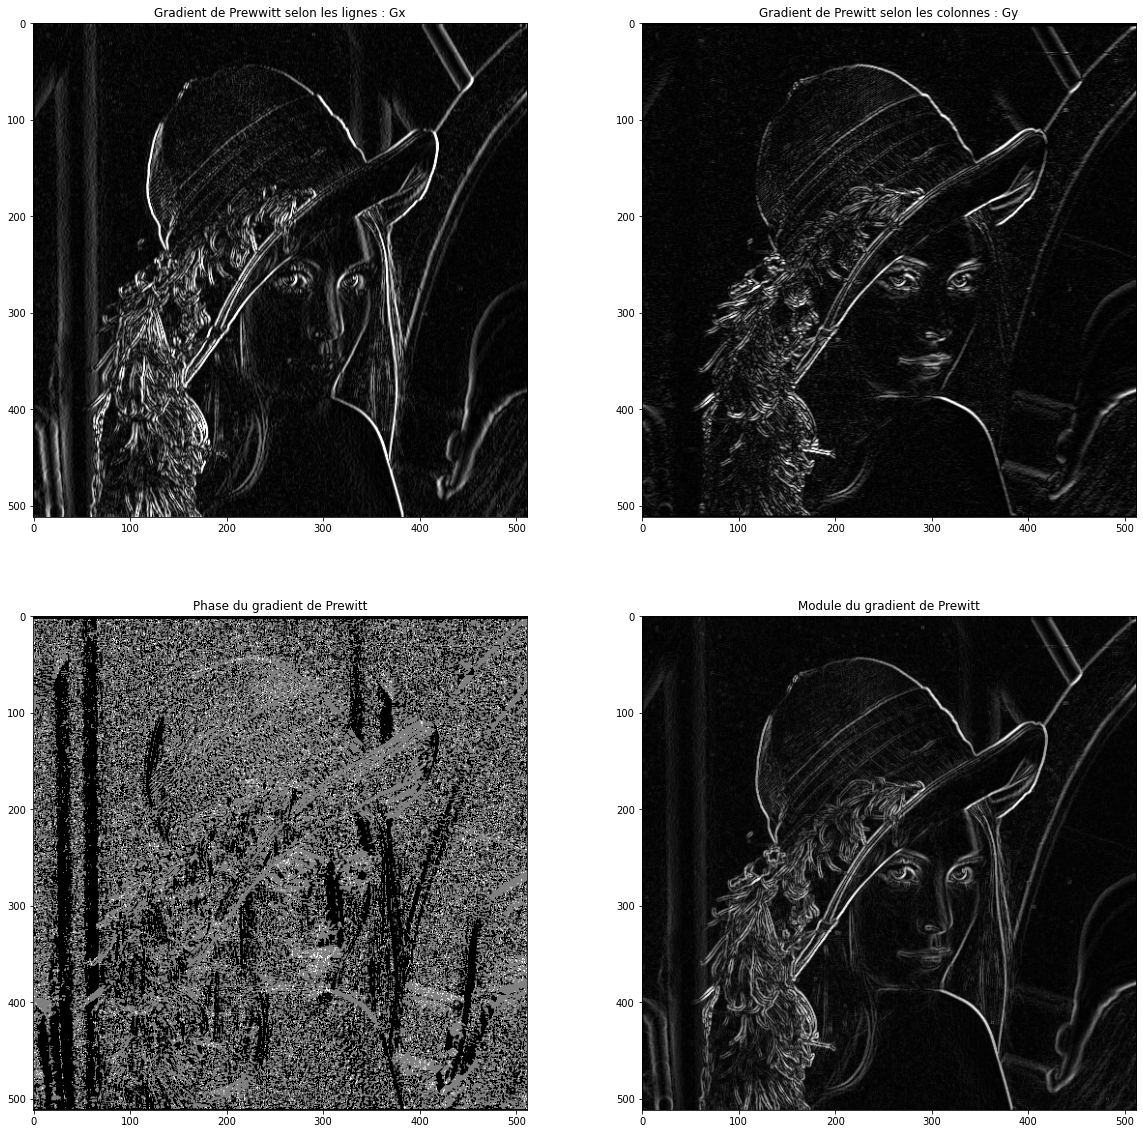

In [ ]:
plt.figure(figsize=(20,20))

#Filtre de convolution de Prewitt (Filtrage spatial et linéaire)
kernelx=np.array([[-1,0,1],[-1,0,1],[-1,0,1]], dtype=int)     # Noyau du filtre selon X
kernely=np.array([[-1,-1,-1],[0,0,0],[1,1,1]], dtype=int)     # Noyau du filtre selon Y
x=cv.filter2D(image_gris, cv.CV_16S, kernelx)     #cv.CV_16S pour désigner les entiers signés codés sur 2 octets
y=cv.filter2D(image_gris, cv.CV_16S, kernely)
Gx=cv.convertScaleAbs(x)
Gy=cv.convertScaleAbs(y)
phase_prewitt=np.arctan(np.divide(Gy,Gx))     #Calcul de la phase
Phase_prewitt=cv.convertScaleAbs(phase_prewitt)
Module_prewitt=cv.addWeighted(Gx,0.5,Gy,0.5,0)
images=[Gx,Gy,Phase_prewitt,Module_prewitt]
titres=["Gradient de Prewwitt selon les lignes : Gx","Gradient de Prewitt selon les colonnes : Gy","Phase du gradient de Prewitt","Module du gradient de Prewitt"]
# Les graphes à afficher
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titres[i])

3/3/ Sobel:

<ipython-input-22-c40ceec52355>:7: RuntimeWarning: divide by zero encountered in true_divide
  phase_sobel=np.arctan(np.divide(Gy,Gx))
<ipython-input-22-c40ceec52355>:7: RuntimeWarning: invalid value encountered in true_divide
  phase_sobel=np.arctan(np.divide(Gy,Gx))


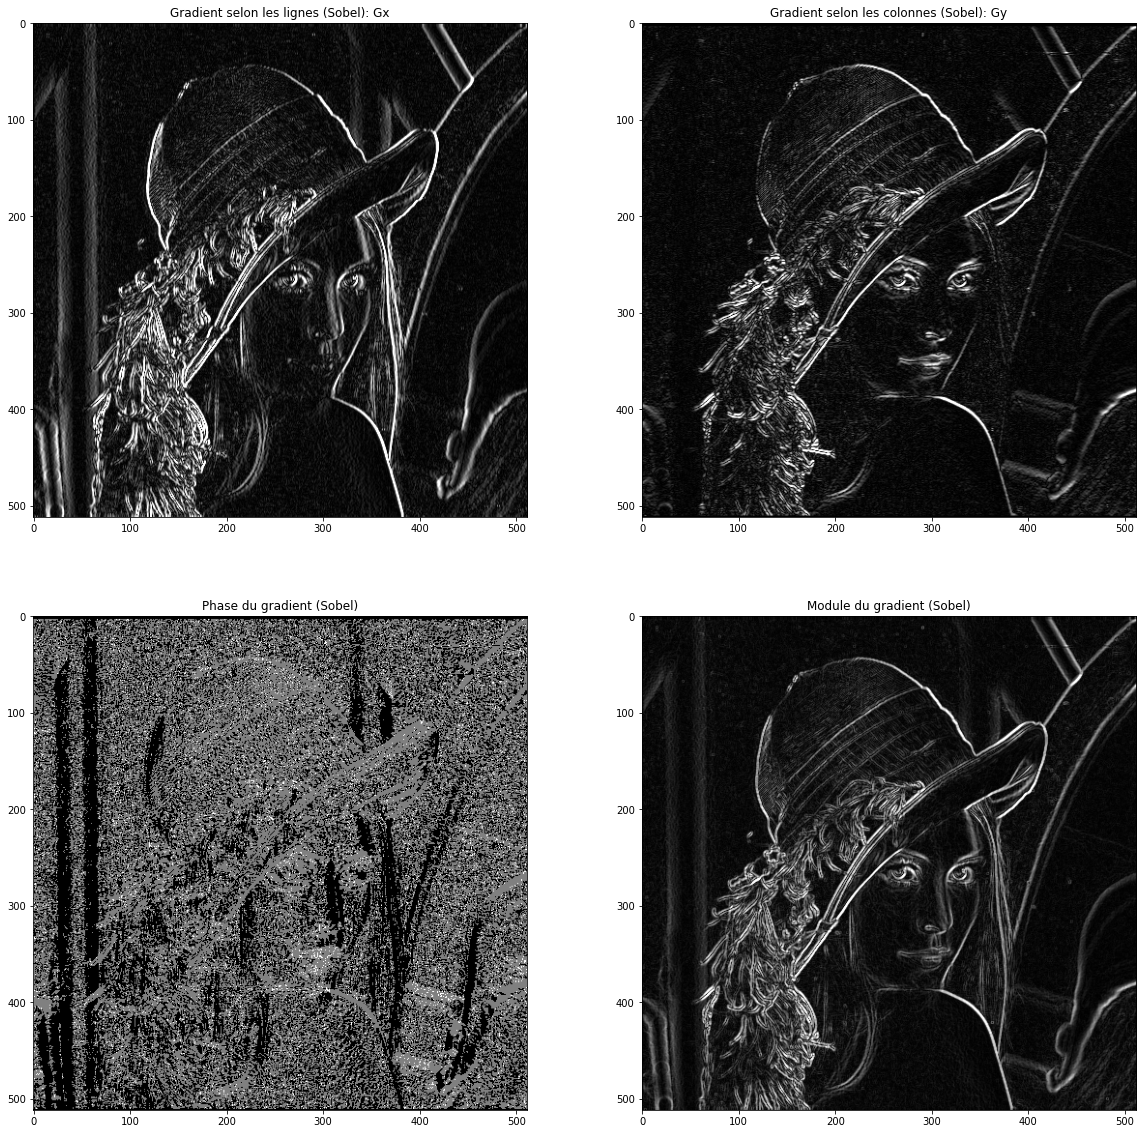

In [ ]:
plt.figure(figsize=(20,20))
# Opérateur Sobel
x=cv.Sobel(image_gris, cv.CV_16S, 1, 0) # Fonction prédéfinie pour le filtre Sobel selon X
y=cv.Sobel(image_gris, cv.CV_16S, 0, 1) # Fonction prédéfinie pour le filtre Sobel selon Y
Gx=cv.convertScaleAbs(x)
Gy=cv.convertScaleAbs(y)
phase_sobel=np.arctan(np.divide(Gy,Gx))
Phase_sobel=cv.convertScaleAbs(phase_sobel)
Module_sobel=cv.addWeighted(Gx,0.5,Gy,0.5,0)
images=[Gx,Gy,Phase_sobel,Module_sobel]
titres=["Gradient selon les lignes (Sobel): Gx","Gradient selon les colonnes (Sobel): Gy","Phase du gradient (Sobel)","Module du gradient (Sobel)"]
# Les affichages
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titres[i])

3/4/ Comparaison des 3 opérateurs de gradient:

On s'apperçoit que les contours qui sont générés par les 3 filtres passe-haut (qui ne laissent passer que les nettes variations de niveaux de gris) sont de nature différente; les contours générés par le gradient classique sont fins et pas très clairs (il risque des fois de former des discontinuités dans ces derniers si l'image originale le permet i.e. il détecte pas aussi efficacement les contours), les contours générés par le filtre Prewitt sont plus épais que ceux du gradient classique et ceux de Sobel le sont le plus.<br>
Les filtres de Prewitt et Sobel approximent le gradient mieux que la méthode classique de calcul.<br>
L'épaisseur des contours fait perdre certains détails de l'image.</br>
Le filtre Sobel approxime un filtre gaussien tandis que Prewitt approxime un filtre moyenneur ce qui explique pourquoi le filtre Sobel génère moins de flou que celui de Prewitt (mais Sobel épaissit les contours..).</br>
On remarque sur que tous les 3 filtres sont sensibles au bruit mais à des degrés différents pour chacun.</br></br>
**Il est à noter que la signification de la phase d'un filtre gradient (un filtre approximatif du gradient en l'occurence) représente la direction dans laquelle la variation des niveaux de gris est maximale localement (à partir du pixel ou on est, dans son voisinage).**

4/ Laplacien 4-connexités et 8-connexités:

Text(0.5, 1.0, 'Filtre Laplacien 8-connexités')

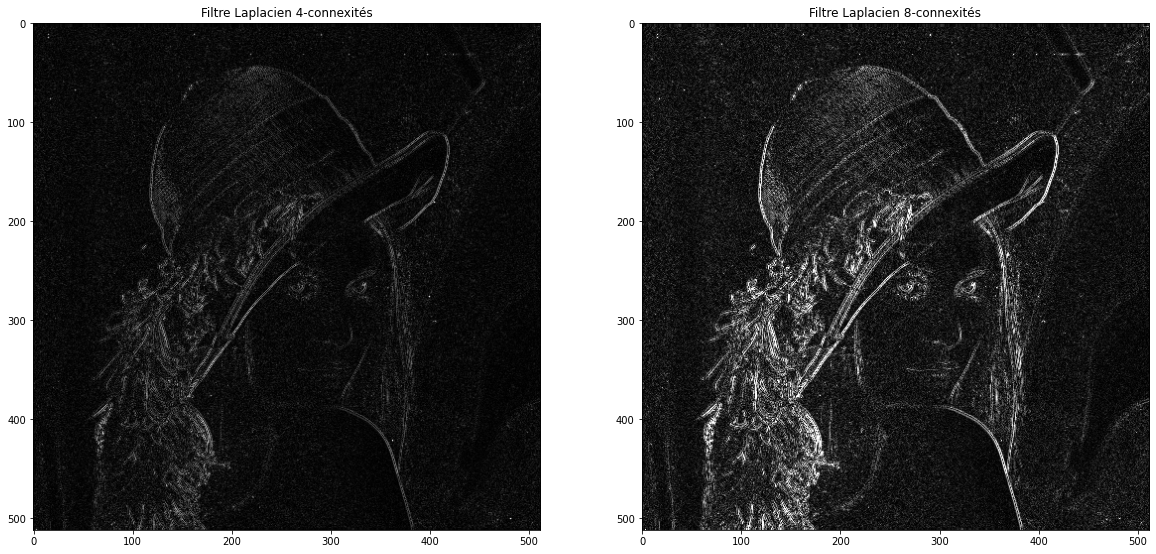

In [ ]:
plt.figure(figsize = (20, 20))

fil_4conn=np.array([[0,1,0],[1,-4,1],[0,1,0]],dtype=int)     # La définition du filtre qui a été vue en cours

c=cv.filter2D(image_gris, cv.CV_16S, fil_4conn)
connexite_4_laplace=cv.convertScaleAbs(c)

plt.subplot(1, 2, 1)
plt.imshow(connexite_4_laplace, cmap="gray")
plt.title('Filtre Laplacien 4-connexités')

fil_8_conn=np.array([[1,1,1],[1,-8,1],[1,1,1]],dtype=int)

d=cv.filter2D(image_gris, cv.CV_16S, fil_8_conn)
connexite_8_laplace=cv.convertScaleAbs(d)

plt.subplot(1, 2, 2)
plt.imshow(connexite_8_laplace, cmap="gray")
plt.title('Filtre Laplacien 8-connexités')

**Comparaison:** </br>
On remarque que le filtre 8-connexités détecte les contours mieux que le filtre 4-connexités sachant que tous les 2 ajoutent du bruit à l'image et celui de 8-connexités en rajoute beaucoup plus. Tous les 2 font un bon travail quant à l'efficacité de la détection des contours et à leur épaisseur.

5/ Filtrage gaussien + Laplacien 8-connexités:

Text(0.5, 1.0, 'Filtrage Gaussien + Laplacien 8-connexités')

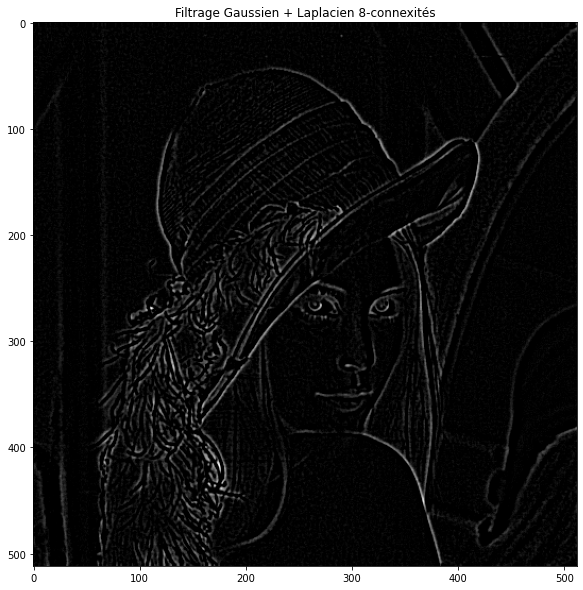

In [ ]:
plt.figure(figsize=(10, 10))        #Réajuster l'affichage de l'image

fil_gauss_avant=cv.GaussianBlur(image_gris,(7,7),1)
mask8=np.array([[1,1,1],[1,-8,1],[1,1,1]])    #Filtre 8-conexités
conn_8=cv.filter2D(fil_gauss_avant,-1, mask8)
Conn_8=cv.convertScaleAbs(conn_8)
plt.imshow(Conn_8,'gray')
plt.title('Filtrage Gaussien + Laplacien 8-connexités')

6/ Comparaison entre les différents filtres:

On remarque que le résultat donné par le filtre 8-connexités après avoir filtré par un filtrage gaussien donne des résultats beaucoup plus intéressants mais il a un effet légèrement négatif sur la force (efficacité) de détection des contours. Donc si on veut détecter les contours par un filtre 8-connexités, il est préférable de passer par un filtrage gaussien pour éliminer tout bruit (car les filtres passe-haut amplifient toujours le bruit s'il y en a et celui des 8-connexités l'amplifie davantage). </br>
</br>
Après avoir fait cette étude, on conclue que les filtres laplaciens détectent mieux les contours en général que les filtres d'approximation du gradient; sauf si que les filtres d'approximation du laplacien amplifient le bruit et les techniques utilisées pour l'éliminer du output affecte l'efficacité de détection des contours. Les filtres du gradient détectent moins efficacement les contours, ils sont aussi moins sensibles au bruit, il y a d'autres approximations du gradient qui permettent d'améliorer l'efficacité de la détection des contours en gardant plus ou moins la même sensibilité au bruit mais ces approximations épaississent les contours et font perdre l'image des détails.
</br>
Donc enfin pour savoir quel filtre utiliser pour détecter les contours, dépendra de ce qu'on voudra et quels aspects négatifs on pourra tolérer moins que les autres.